In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import numpy as np
warnings.filterwarnings('ignore')

# Load the data into a Pandas dataframe
df = pd.read_csv("toronto_emi.csv")

In [28]:
df = df.drop('Unnamed: 3', axis=1)
df = df.drop('Unnamed: 4', axis=1)


In [31]:
c = 1

# Add the constant value to the ef column
df['ef_plus_c'] = df['emi'] + c

# Apply the natural logarithm function to the ef_plus_c column
df['log_ef'] = np.log(df['ef_plus_c'])
df.head()

,model_year,pollutant,emi,ef_plus_c,log_ef
0,2018,CO2,322.0,323.0,5.777652
1,2006,CO2,90.2,91.2,4.513055
2,2007,CO2,105.0,106.0,4.663439
3,2010,CO2,161.0,162.0,5.087596
4,2011,CO2,130.0,131.0,4.875197


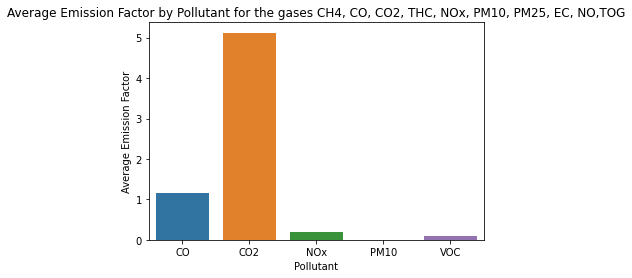

In [34]:
import seaborn as sns
# Calculate average ef for each pollutant
avg_ef_by_pollutant = df.groupby('pollutant')['log_ef'].mean()

# Create a bar plot of the average ef values
sns.barplot(x=avg_ef_by_pollutant.index, y=avg_ef_by_pollutant.values)

# Add labels and title
plt.xlabel('Pollutant')
plt.ylabel('Average Emission Factor')
plt.title('Average Emission Factor by Pollutant')

# Show the plot
plt.show()

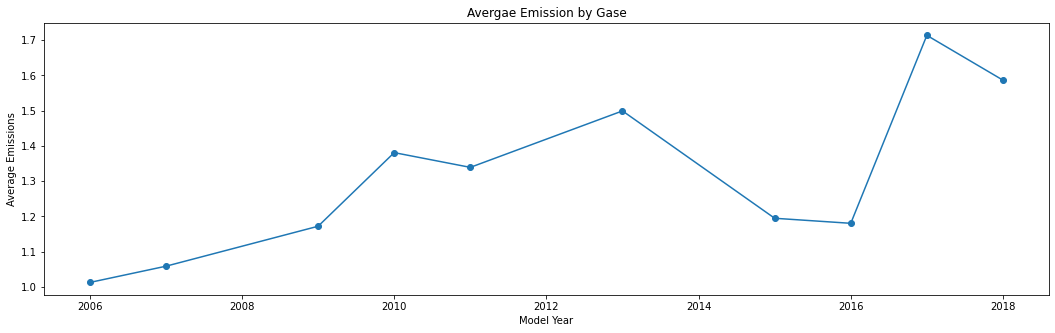

In [37]:
# Group the data by reference year and calculate the average emissions for each year
reference_years = df.groupby('model_year').mean()['log_ef']
plt.figure(figsize = (18,5))
# Plot a line chart of the reference year trend
plt.plot(reference_years.index, reference_years.values, '-o')
plt.xlabel('Model Year')
plt.ylabel('Average Emissions')
plt.title('Avergae Emission by Gase')
plt.show()

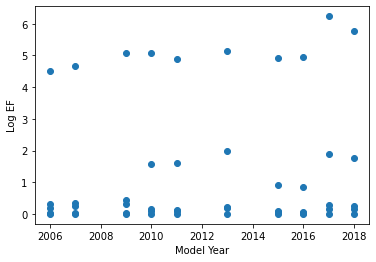

In [22]:
# Create a scatter plot of 'model_year' vs 'log_ef'
plt.scatter(df['model_year'], df['log_ef'])
plt.xlabel('Model Year')
plt.ylabel('Log EF')
plt.show()

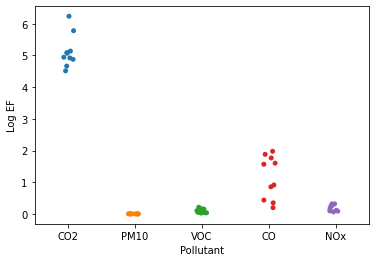

In [23]:
# Create a scatter plot of 'pollutant' vs 'log_ef'
sns.stripplot(x='pollutant', y='log_ef', data=df)
plt.xlabel('Pollutant')
plt.ylabel('Log EF')
plt.show()

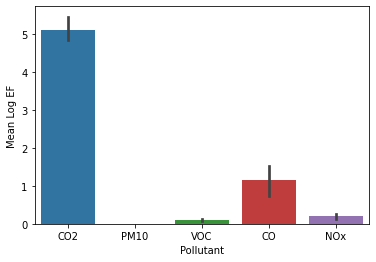

In [24]:
# Create a bar plot of the mean 'log_ef' for each 'pollutant'
sns.barplot(x='pollutant', y='log_ef', data=df)
plt.xlabel('Pollutant')
plt.ylabel('Mean Log EF')
plt.show()

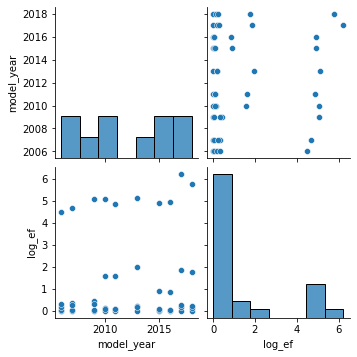

In [20]:
# Create a scatter plot matrix of all numerical columns
sns.pairplot(df[['model_year', 'pollutant', 'log_ef']])
plt.show()



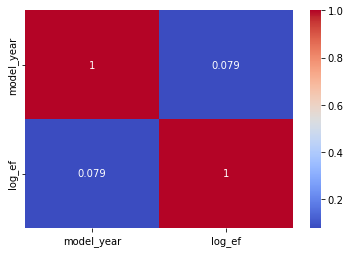

In [21]:
# Create a heatmap of the correlation matrix
corr = df[['model_year', 'pollutant', 'log_ef']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

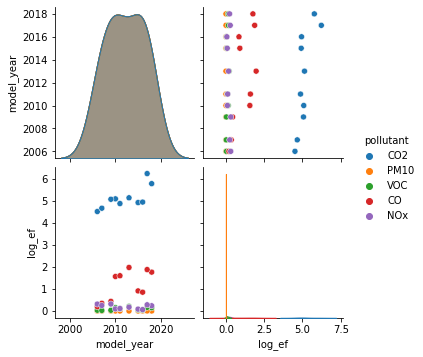

In [38]:
# Create a scatter plot matrix with hue based on 'pollutant'
sns.pairplot(data=df, vars=['model_year', 'log_ef'], hue='pollutant')
plt.show()

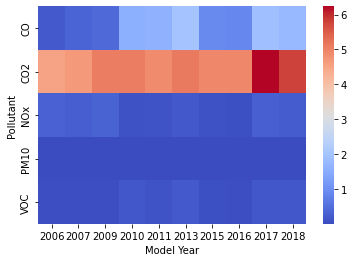

In [41]:

# Create a heatmap of 'log_ef' with 'model_year' on the x-axis and 'pollutant' on the y-axis
pivot_df = df.pivot_table(values='log_ef', index='pollutant', columns='model_year')
sns.heatmap(pivot_df, cmap='coolwarm')
plt.xlabel('Model Year')
plt.ylabel('Pollutant')
plt.show()